<a href="https://colab.research.google.com/github/mscitpract/DL/blob/main/Performing_encoding_and_decoding_of_images_using_deep_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3798 - val_loss: -3.6303
Epoch 2/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1822 - val_loss: -11.4273
Epoch 3/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1490 - val_loss: -18.6418
Epoch 4/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1307 - val_loss: -24.2045
Epoch 5/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1193 - val_loss: -31.2593
Epoch 6/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1115 - val_loss: -38.8010
Epoch 7/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1057 - val_loss: -46.2497
Epoch 8/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1020 - val_loss: -54.7951
Epoch 9/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0993 - val_loss: -61.4110
Epoch 10/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0975 - val_loss: -66.8688
Epoch 11/13
235/235 ━━━━━━━━━━━━━

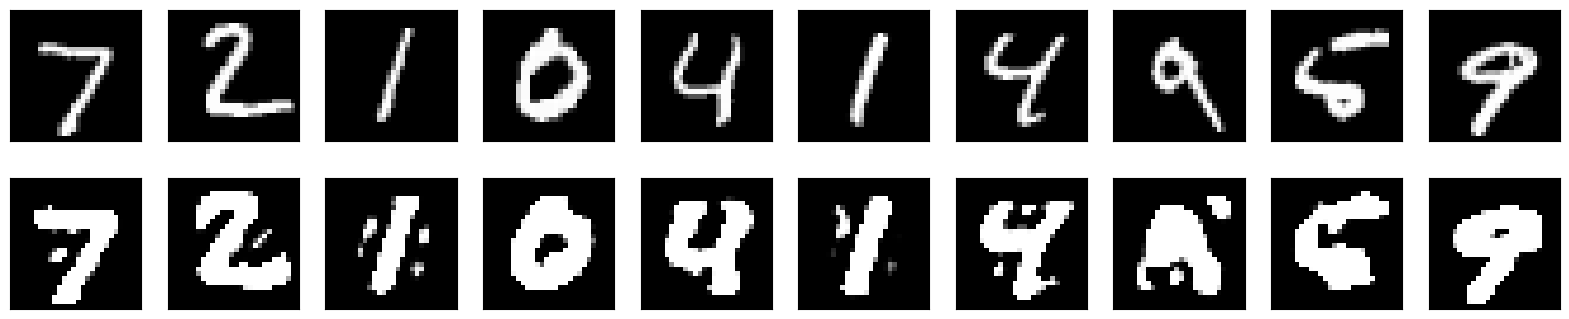

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim=32

input_img=keras.Input(shape=(784,))
encoded=layers.Dense(encoding_dim,activation='relu')(input_img)
decoded=layers.Dense(784,activation='sigmoid')(encoded)
autoencoder=keras.Model(input_img,decoded)

encoder=keras.Model(input_img,encoded)
encoded_input=keras.Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=keras.Model(encoded_input,decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/25
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train,x_train,epochs=13,batch_size=256,shuffle=True,validation_data=(x_test,x_test))
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)

n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()